Example of 'preprocess' step in which an input file describing the study region is discretized in H3 cells, visualized, and exported back.

In [1]:
import geopandas
import h3
import folium
import matplotlib
import json
from shapely.geometry import Polygon
import importlib
import numpy

import sys
sys.path.append('../')

import DiscretizationBox
import DiscretizationBox.folium
import DiscretizationBox.travel_times.graphhopper


Import and visualize the original region:

In [2]:
data_path = "C:/Users/andrekrauss/Documents/Projeto_PO2/dados/entrada/rj"

<AxesSubplot:>

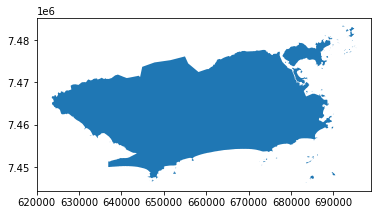

In [3]:
gdf = geopandas.read_file(data_path).reset_index()
gdf.plot()

Discretize it using the generate_discretization function. This uses Uber's H3 library function the find the H3 cells that better aproximate the study region in the given resolution.

In [4]:
help(DiscretizationBox.generate_discretization)

Help on function generate_discretization in module DiscretizationBox.interface:

generate_discretization(gdf, shape='hexagons', h3_discretization_level=6, export_friendly=False)
    Generate an enriched, discretized GeoDataFrame from the original geodataframe. The GeoDataFrame returned should work seamlessly with
        other functions provided within this module.
    
    Params:
        gdf : (string, GeoDataFrame) - a path to a GeoDataFrame or a GeoDataFrame object
        shape : ('rectangles', 'hexagons', 'none', False) - the shape in which the space should be discretized. If 'none' or False, no discretization is done
        h3_discretization_level - if using 'hexagons', this sets the resolution level passed to the H3 library. A bigger number means smaller hexagons. Valid range [0,15]
        export_friendly : (bool) - if True, the returned geodataframe is transformed to contain only columns that can be easily exported



In [ ]:
hex_gdf = DiscretizationBox.generate_discretization(gdf, shape = 'hexagons', h3_discretization_level = 6)
hex_gdf.plot()

The return is also a geodataframe, in the following format:

In [ ]:
hex_gdf.head(3)

We can visualize the discretization in more detail by using folium, for example

In [ ]:
DiscretizationBox.folium.visualize_h3(hex_gdf)

We can then export the discretization to file in all the formats supported by geopandas / fiona

In [ ]:
DiscretizationBox.save_gdf('test', driver='ESRI Shapefile')

In [ ]:
export_gdf = DiscretizationBox.to_export_friendly(hex_gdf)

In [ ]:
export_gdf.to_file('test', driver='ESRI Shapefile')

In [ ]:
export_gdf.to_file('test.geojson', driver='GeoJSON')

A list of all supported formats:

In [ ]:
import fiona; fiona.supported_drivers

For reimporting, simply use geopandas:

In [ ]:
t1 = geopandas.read_file('test').reset_index()
t1.head(3)

In [ ]:
list(map(int, t1['neighbors'][0].split('-')))

You can also undo the 'export friendly' changes:

In [ ]:
t1 = DiscretizationBox.from_export_friendly(t1)
t1.head(3)

We can also obtain a distance matrix for these hexagons.

You must first set your graphhopper api key. Try not use all your credits at once! Be careful with large areas and/or small cells. 

In [ ]:
#my key is saved in the config file, but you can set it however you like
DiscretizationBox.travel_times.graphhopper.set_graphhopper_key(config.GH_KEY)

In [ ]:
dist_matrix = DiscretizationBox.travel_times.graphhopper.distance_matrix_from_gdf(hex_gdf)
dist_matrix

We can then cache it into a file, so we don't spend too many credits over time

In [ ]:
numpy.save(os.path.join( TRTD_DATA_PATH, 'rj_hex/travel_times.npy'), dist_matrix, allow_pickle = True)

We can then read it back easily:

In [ ]:
dist_matrix_read = numpy.load(os.path.join( TRTD_DATA_PATH, 'rj_hex/travel_times.npy'), allow_pickle = True)
dist_matrix_read